<a href="https://colab.research.google.com/github/lorysduez/ProjetP5/blob/main/Limiter_actions_et_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

**Liste des entreprises : indices**


In [ ]:
entreprises = ['AIR.PA', 'AI.PA', 'ALO.PA','MT.AS',
           'CS.PA', 'BNP.PA', 'EN.PA', 'CAP.PA', 'CA.PA',
           'AC.PA', 'BN.PA', 'DSY.PA', 'ENGI.PA', 'ERF.PA', 'EL.PA',
           'RMS.PA', 'KER.PA', 'OR.PA', 'LR.PA', 'MC.PA', 'ML.PA', 'ORA.PA', 'RI.PA', 'PUB.PA', 'RNO.PA', 'SAF.PA'
           , 'SGO.PA', 'SAN.PA', 'SU.PA', 'GLE.PA', 'STM.PA', 'TEP.PA', 'HO.PA', 'TTE.PA'
           , 'URW.AS', 'VIE.PA', 'DG.PA', 'VIV.PA', 'WLN.PA']

**Télécharger les données depuis Yahoo Finance**


In [ ]:
data = yf.download(entreprises, start="2022-03-09", end="2023-03-09")["Adj Close"]

[*********************100%***********************]  39 of 39 completed


In [ ]:
print(data)

**Calculer les rendements quotidiens pour chaque action**

In [ ]:
rendements_quotidiens = data.pct_change()

In [ ]:
print(rendements_quotidiens)

**Matrice de corrélation de rendements quotidien**

In [ ]:
correlation_matrix = rendements_quotidiens.corr()

In [ ]:
print(correlation_matrix)

**Dictionnaire**

In [ ]:
#Dictionnaire
entreprises_dict = {
    'AIR.PA' : 'AIRBUS GROUP',
    'AI.PA' : 'AIR LIQUIDE',
    'ALO.PA' : 'ALSTOM',
    'MT.AS' : 'ARCELORMITTAL',
    'CS.PA' : 'AXAF',
    'BNP.PA' : 'BNP PARIBAS',
    'EN.PA' : 'BOUYGUES',
    'CAP.PA' : 'CAPGEMINI',
    'CA.PA' : 'CARREFOUR',
    'AC.PA' : 'CREDIT AGRICOLE',
    'BN.PA' : 'DANONE',
    'DSY.PA' : 'DASSAULT SYSTEMES',
    'ENGI.PA' : 'ENGIE',
    'ERF.PA' : 'EUROFINS SCIENTIFIC',
    'EL.PA' : 'ESSILORLUXOTTICA',
    'RMS.PA' : 'HERMES',
    'KER.PA' : 'KERING',
    'OR.PA' : 'L OREAL',
    'LR.PA' : 'LEGRAND',
    'MC.PA' : 'LVMH',
    'ML.PA' : 'MICHELIN',
    'ORA.PA' : 'ORANGE',
    'RI.PA' : 'PERNOD RICARD',
    'PUB.PA' : 'PUBLICIS',
    'RNO.PA' : 'RENAULT',
    'SAF.PA' : 'SAFRAN',
    'SGO.PA' : 'SAINT-GOBAIN',
    'SAN.PA' : 'SANOFI',
    'SU.PA' : 'SCHNEIDER ELECTRIC',
    'GLE.PA' : 'SOCIETE GENERALE',
    'STM.PA' : 'STMICROELECTRONICS',
    'TEP.PA' : 'TELEPERFORMANCE',
    'HO.PA' : 'THALES',
    'TTE.PA' : 'TOTALENERGIES',
    'URW.AS' : 'UNIBAIL-RODAMCO',
    'VIE.PA' : 'VEOLIA ENVIRONNEMENT',
    'DG.PA' : 'VINCI',
    'VIV.PA' : 'VIVENDI',
    'WLN.PA' : 'WORLDLINE',
}

**Afficher les 10 actions les - corrélées**

In [ ]:
min_correlation = correlation_matrix.abs().unstack().sort_values()
unique_min_correlation = min_correlation.drop_duplicates()

# Extraire les noms des actions
actions = unique_min_correlation.reset_index()
actions.columns = ['Action1', 'Action2', 'Correlation']

# Stocker les noms des actions dans une liste
actions_list = actions['Action1'].tolist() + actions['Action2'].tolist()
actions_list = list(set(actions_list))

actions_listentr = [entreprises_dict[action] for action in actions_list]


# Afficher les 10 actions les moins corrélées
print("Les 10 actions les moins corrélées sont :")
print(actions_list[:10])


Les 10 actions les moins corrélées sont :
['ORA.PA', 'HO.PA', 'URW.AS', 'LR.PA', 'ENGI.PA', 'VIV.PA', 'WLN.PA', 'RNO.PA', 'SU.PA', 'SAF.PA']


**Affichage des 10 actions + indices les - corrélées**

In [ ]:
result = []
for action in actions_listentr[:10]:
    entreprise = next((k for k, v in entreprises_dict.items() if v == action))
    result.append(f"{entreprise} - {action}")
print(result)

['ORA.PA - ORANGE', 'HO.PA - THALES', 'URW.AS - UNIBAIL-RODAMCO', 'LR.PA - LEGRAND', 'ENGI.PA - ENGIE', 'VIV.PA - VIVENDI', 'WLN.PA - WORLDLINE', 'RNO.PA - RENAULT', 'SU.PA - SCHNEIDER ELECTRIC', 'SAF.PA - SAFRAN']


**On crée une nouvelle variable "data_new" qui prends en compte que les 10 actions les - corrélées avec leurs cours à la fermeture**

In [ ]:
data_new = data.loc[:, actions_list[:10]]

In [ ]:
print(data_new)

**Moyenne mobile**

In [ ]:
# Définir la taille de la fenêtre de la moyenne mobile
"window_size = 50"

# Calculer la moyenne mobile sur les X derniers jours pour chaque colonne du DataFrame
MA30 = data_new.rolling(30).mean()
MA100 = data_new.rolling(100).mean()

In [ ]:
df = pd.concat([data_new, MA30, MA100])
print(df)

In [ ]:
actions = df.columns
print(actions)

Index(['ENGI.PA', 'SU.PA', 'ALO.PA', 'VIV.PA', 'CS.PA', 'DG.PA', 'VIE.PA',
       'RI.PA', 'KER.PA', 'SGO.PA'],
      dtype='object')


**Affichage du cours de l'action//Stratégie moyennes mobiles double**

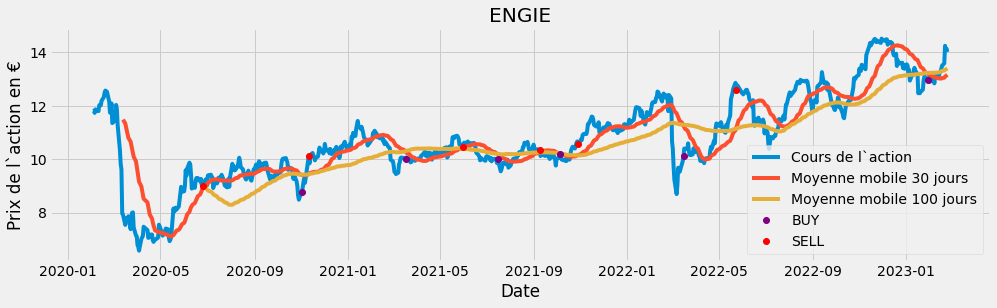

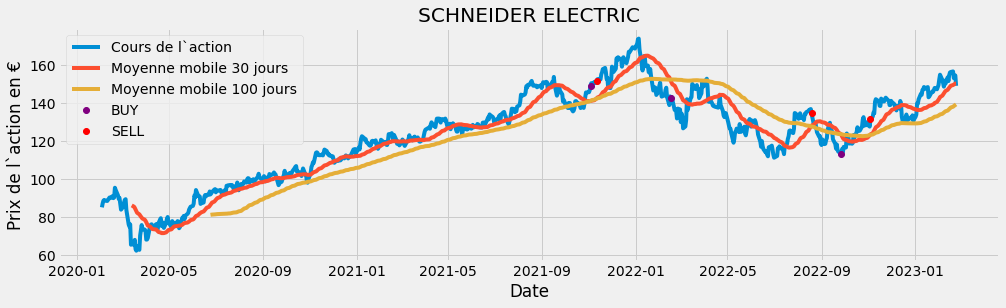

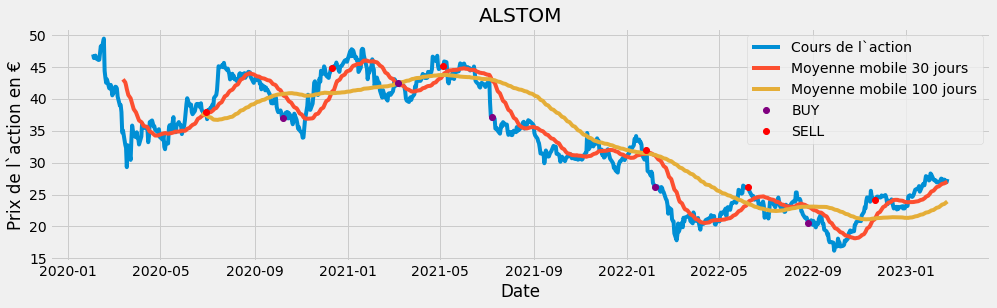

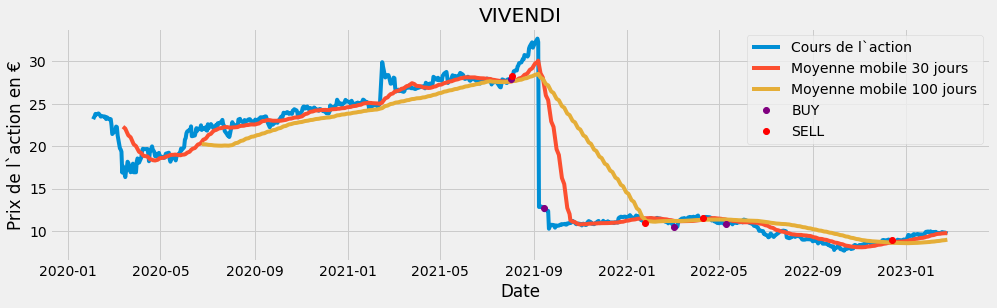

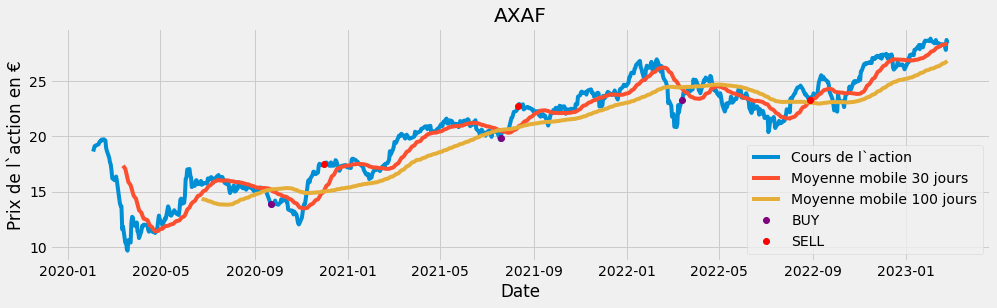

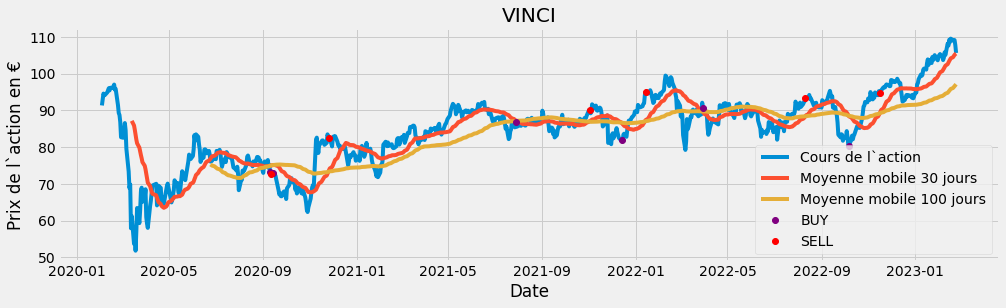

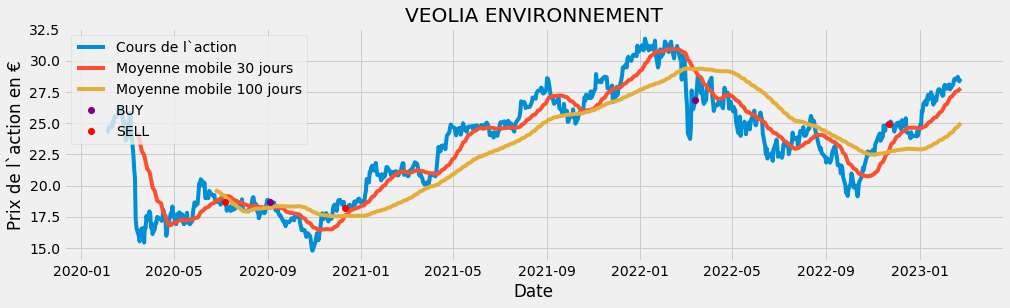

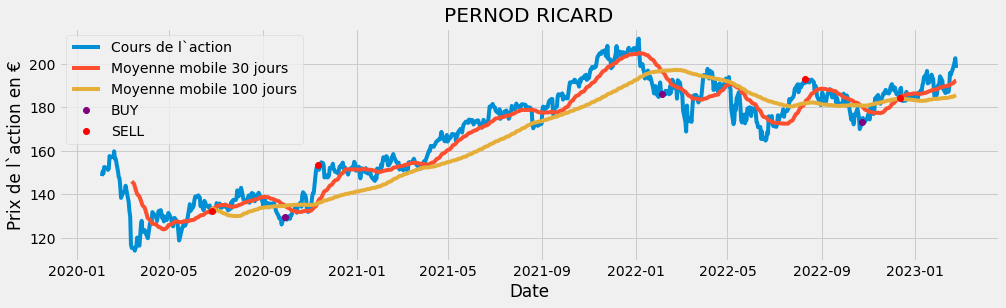

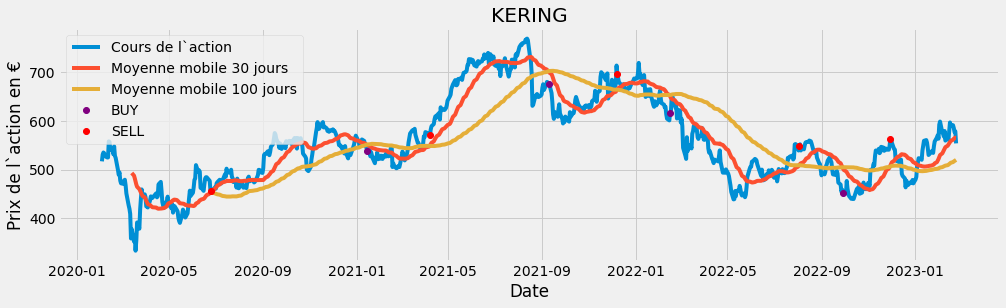

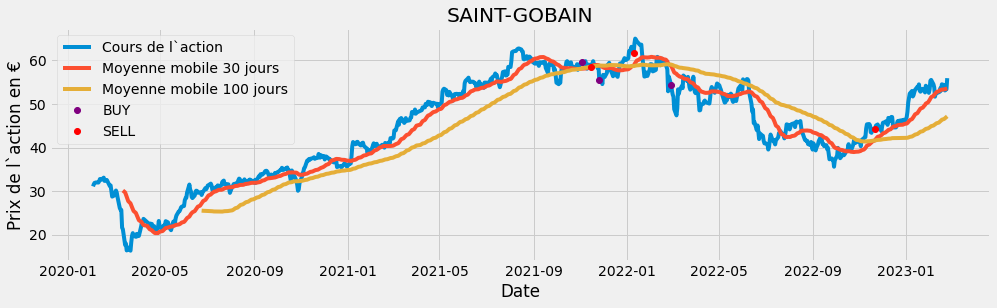

In [ ]:
for action in actions:
    buy_points = data_new[action][(MA30[action] < MA100[action]) & (MA30[action].shift(1) >= MA100[action].shift(1))]
    sell_points = data_new[action][(MA30[action] > MA100[action]) & (MA30[action].shift(1) <= MA100[action].shift(1))]
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 4)
    ax.plot(data_new[action], label='Cours de l`action')
    ax.plot(MA30[action], label='Moyenne mobile 30 jours')
    ax.plot(MA100[action], label='Moyenne mobile 100 jours')
    ax.plot(buy_points.index, buy_points, 'o', color='purple', label="BUY")
    ax.plot(sell_points.index, sell_points, 'o', color='red', label="SELL")
    ax.legend()
    ax.set_title(entreprises_dict.get(action))
    ax.set_xlabel('Date')
    ax.set_ylabel('Prix de l`action en €')    
plt.show()

**ARIMA Test Carrefour**

In [ ]:
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
dfarima= yf.download('CA.PA',start="2020-02-02", end="2023-02-20")

[*********************100%***********************]  1 of 1 completed


In [ ]:
dfarima


<function matplotlib.pyplot.show(close=None, block=None)>

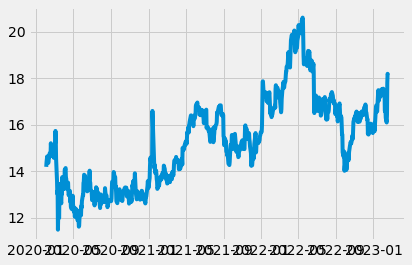

In [ ]:
plt.plot(dfarima.index, dfarima['Adj Close'])
plt.show

In [ ]:
#Train Test split

to_row = int(len(dfarima)*0.7)
training_data=list(dfarima[0:to_row]['Adj Close'])
testing_data=list(dfarima[to_row:]['Adj Close'])

In [ ]:
model_predictions=[]
n_test_obser=len(testing_data)

In [ ]:
for i in range(n_test_obser):
  model=ARIMA(training_data, order=(4,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=output[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)

----------------------------------------

In [ ]:
print(model_fit.summary())

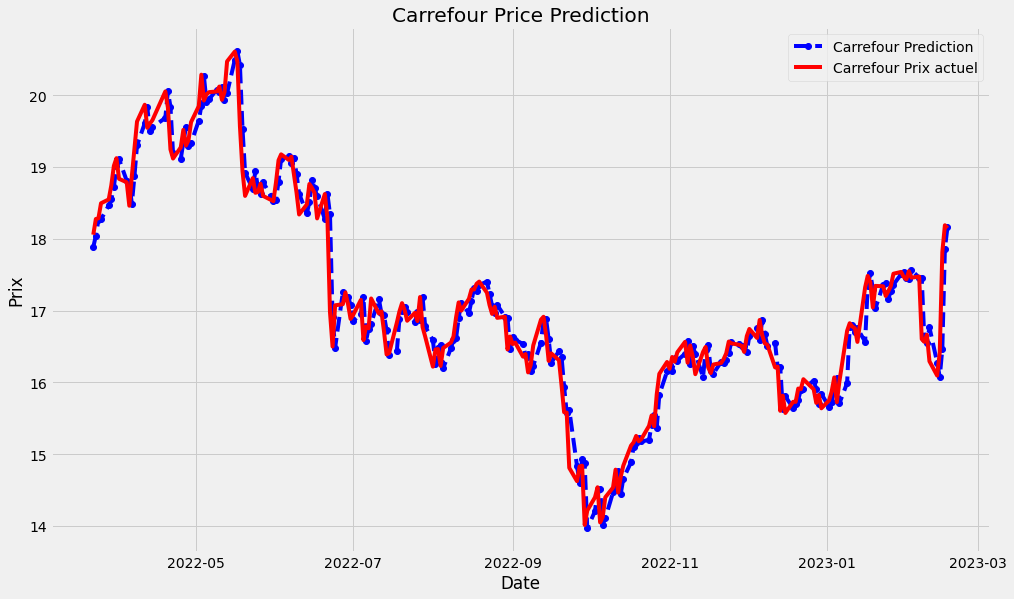

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range = dfarima[to_row:].index

plt.plot(date_range, model_predictions, color='blue', marker ='o', linestyle = 'dashed', label = 'Carrefour Prediction')
plt.plot(date_range, testing_data, color='red', label = 'Carrefour Prix actuel')

plt.title('Carrefour Price Prediction')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

In [ ]:
MAPE = (np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.abs(testing_data)))
MAPEper = MAPE*100
MAPEper= round(MAPEper,3)
print('MAPE : '+str(MAPEper)+'%')
Acc = 1-MAPE
Accper = Acc*100
Accper=round(Accper,3)
print('Accuracy :'+str(Accper)+'%')

MAPE : 1.215%
Accuracy :98.785%


**Entrainement MC.PA**

In [ ]:
dMC= yf.download('MC.PA',start="2020-02-02", end="2023-12-02")

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Train Test split
to_rowMC = int(len(dMC)*0.7)
training_dataMC=list(dMC[0:to_rowMC]['Adj Close'])
testing_dataMC=list(dMC[to_rowMC:]['Adj Close'])

In [ ]:
model_predictionsMC=[]
n_test_obser=len(testing_dataMC)
for i in range(n_test_obser):
  modelMC=ARIMA(training_dataMC, order=(4,1,0))
  model_fit=modelMC.fit()
  output=model_fit.forecast()
  yhat=output[0]
  model_predictionsMC.append(yhat)
  actual_test_value=testing_dataMC[i]
  training_dataMC.append(actual_test_value)

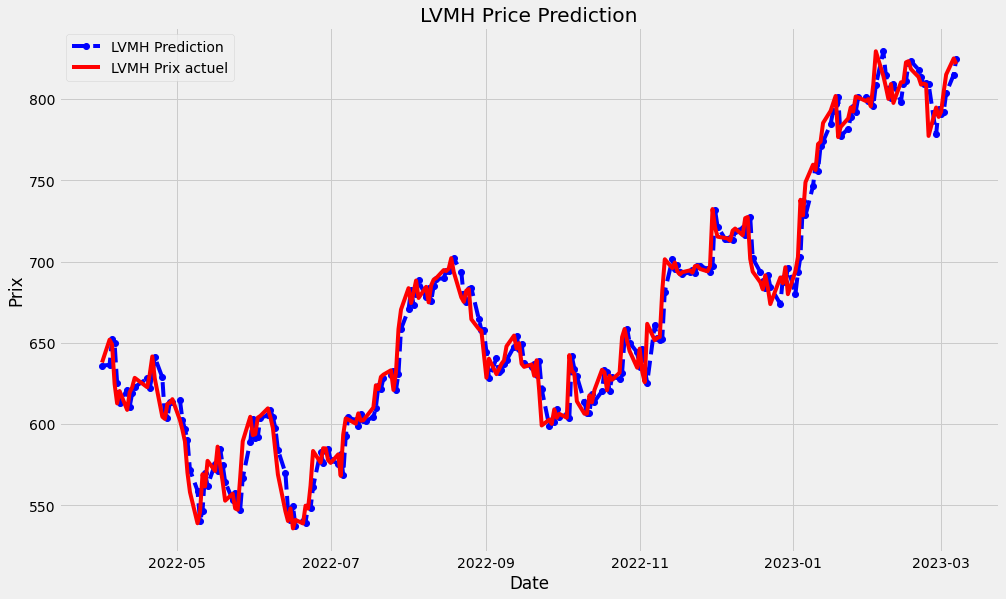

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_rangeMC = dMC[to_rowMC:].index

plt.plot(date_rangeMC, model_predictionsMC, color='blue', marker ='o', linestyle = 'dashed', label = 'LVMH Prediction')
plt.plot(date_rangeMC, testing_dataMC, color='red', label = 'LVMH Prix actuel')

plt.title('LVMH Price Prediction')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

In [ ]:
MAPEMC = (np.mean(np.abs(np.array(model_predictionsMC)-np.array(testing_dataMC))/np.abs(testing_dataMC)))
MAPEperMC = MAPEMC*100
MAPEperMC= round(MAPEperMC,3)
print('MAPE : '+str(MAPEperMC)+'%')
AccMC = 1-MAPEMC
AccperMC = AccMC*100
AccperMC=round(AccperMC,3)
print('Accuracy :'+str(AccperMC)+'%')

MAPE : 1.344%
Accuracy :98.656%


**TEST AVEC TOUTES LES ACTIONS DE LA LISTE ARIMA**

In [ ]:
actions = data_new.columns.tolist()
print(actions)

['ENGI.PA', 'SU.PA', 'ALO.PA', 'VIV.PA', 'CS.PA', 'DG.PA', 'VIE.PA', 'RI.PA', 'KER.PA', 'SGO.PA']


In [ ]:
dfs=[]
for action in actions:
    df2 = yf.download(action, start='2020-02-02', end='2023-02-22',group_by='action')
    dfs.append(df2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(dfs)

In [ ]:
all_predictions = []
for df1 in dfs:
    to_row2 = int(len(df1) * 0.7)
    training_data2 = list(df1[0:to_row2]['Adj Close'])
    testing_data2 = list(df1[to_row2:]['Adj Close'])
    model_predictions2 = []
    n_test_obs = len(testing_data2)
    for i in range(n_test_obs):
        model = ARIMA(training_data2, order=(4, 1, 0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        actual_test_value = testing_data2[i]
        training_data2.append(actual_test_value)
        model_predictions2.append(yhat)
    all_predictions.append(model_predictions2)

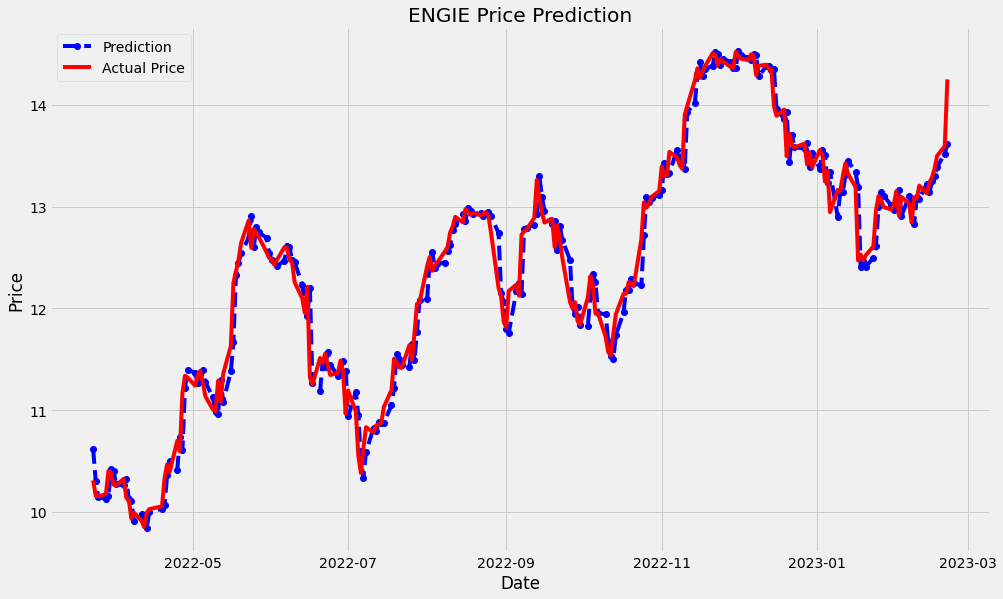

MAPE for ENGIE: 1.151%
Accuracy for ENGIE: 98.849%



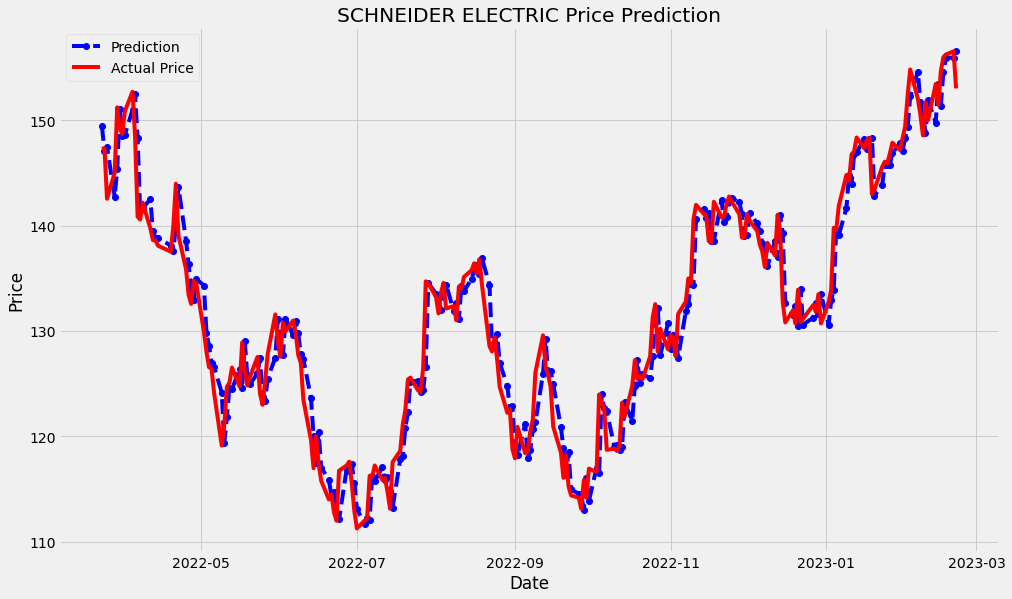

MAPE for SCHNEIDER ELECTRIC: 1.479%
Accuracy for SCHNEIDER ELECTRIC: 98.521%



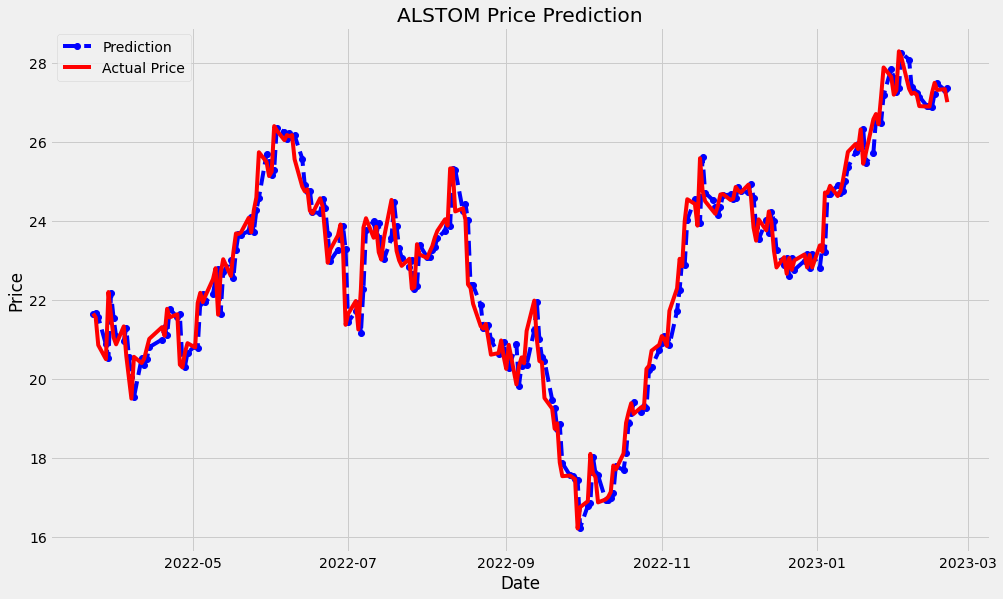

MAPE for ALSTOM: 1.838%
Accuracy for ALSTOM: 98.162%



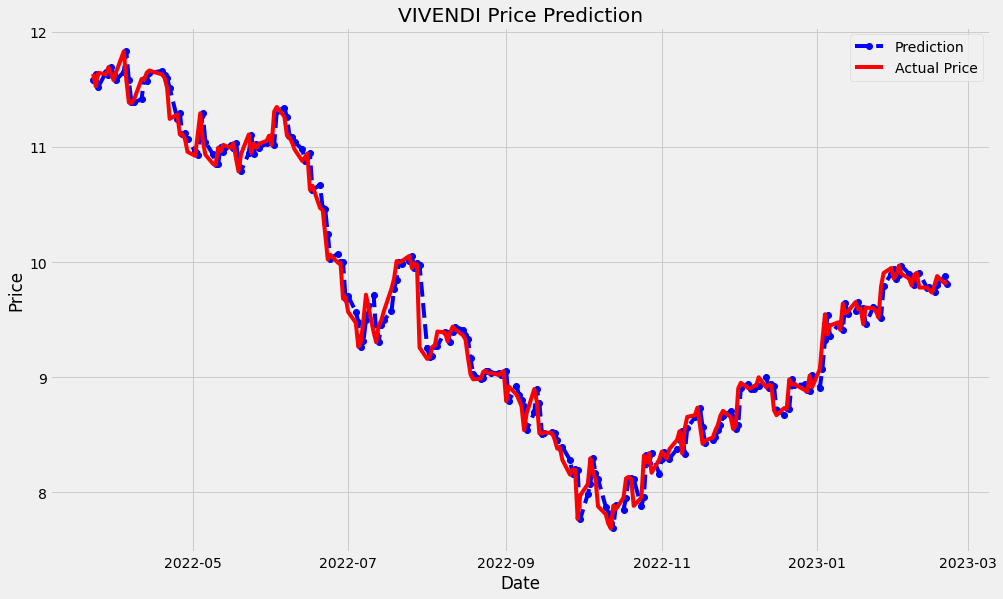

MAPE for VIVENDI: 1.004%
Accuracy for VIVENDI: 98.996%



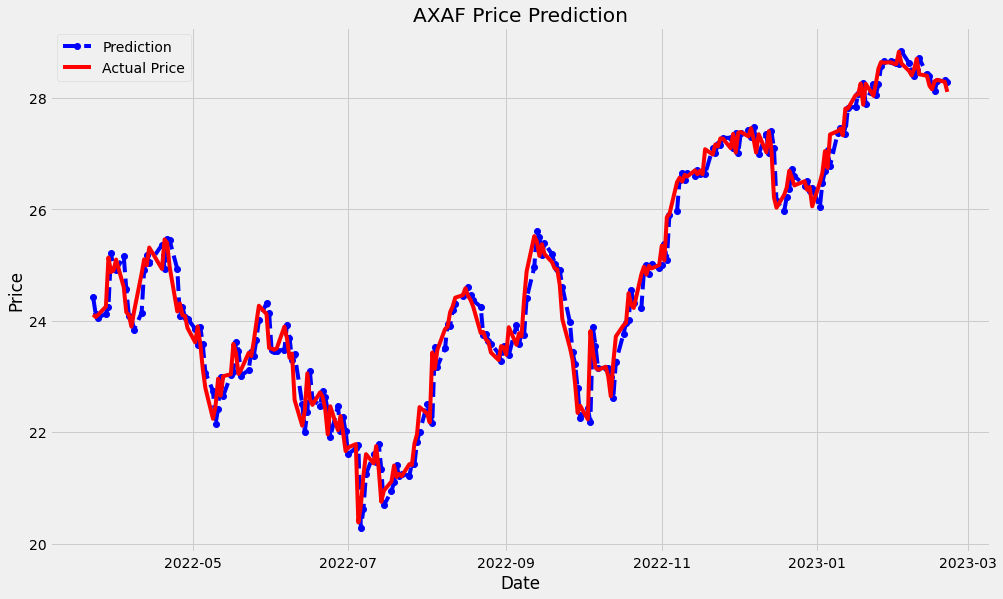

MAPE for AXAF: 1.083%
Accuracy for AXAF: 98.917%



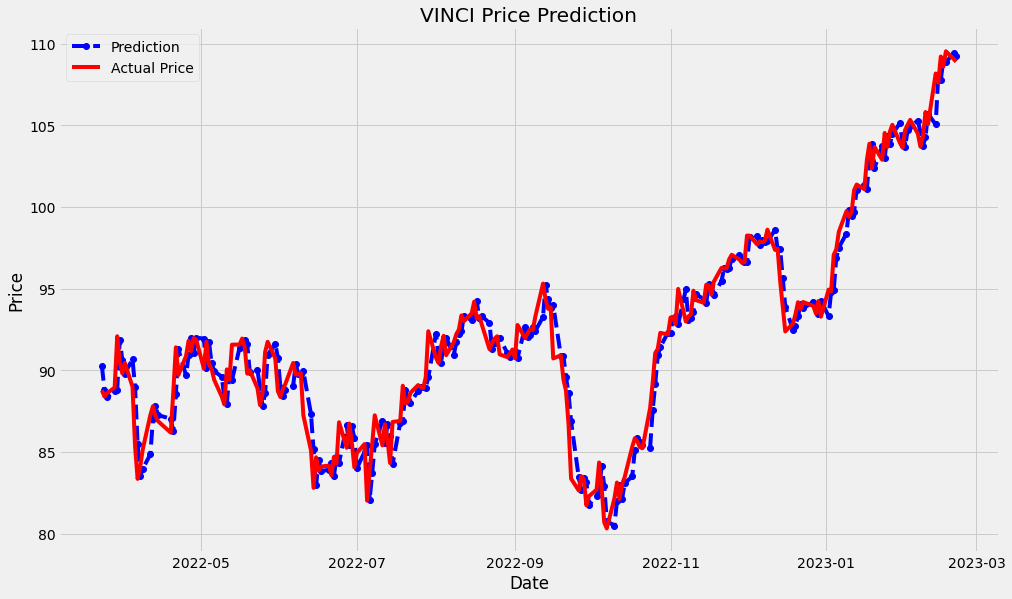

MAPE for VINCI: 1.057%
Accuracy for VINCI: 98.943%



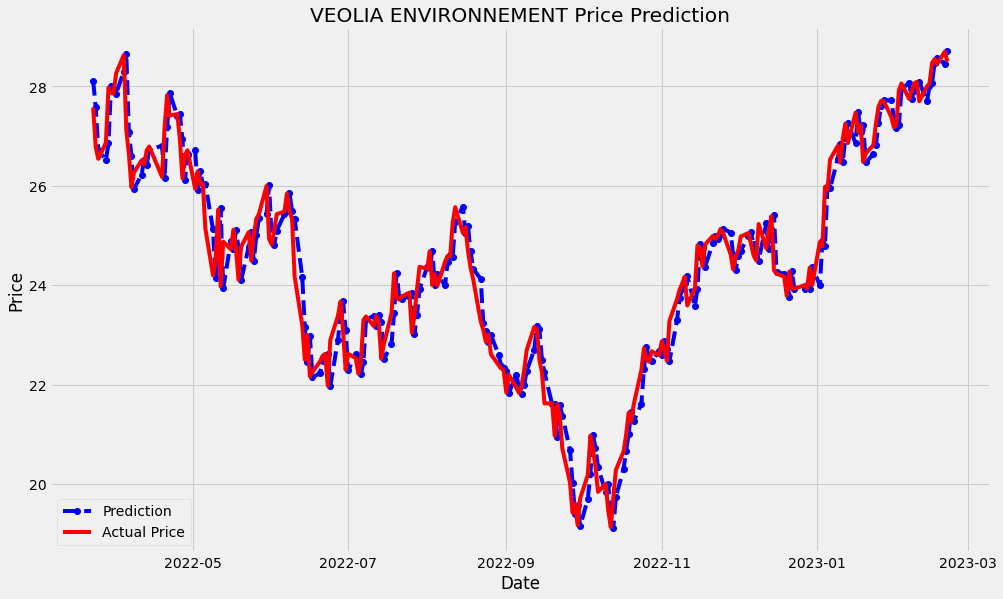

MAPE for VEOLIA ENVIRONNEMENT: 1.588%
Accuracy for VEOLIA ENVIRONNEMENT: 98.412%



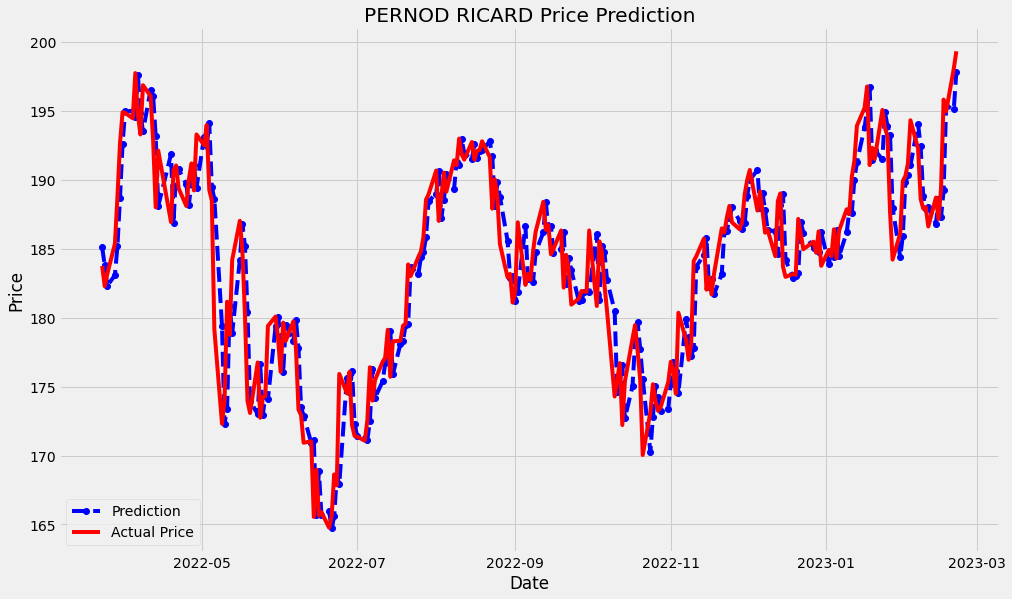

MAPE for PERNOD RICARD: 1.139%
Accuracy for PERNOD RICARD: 98.861%



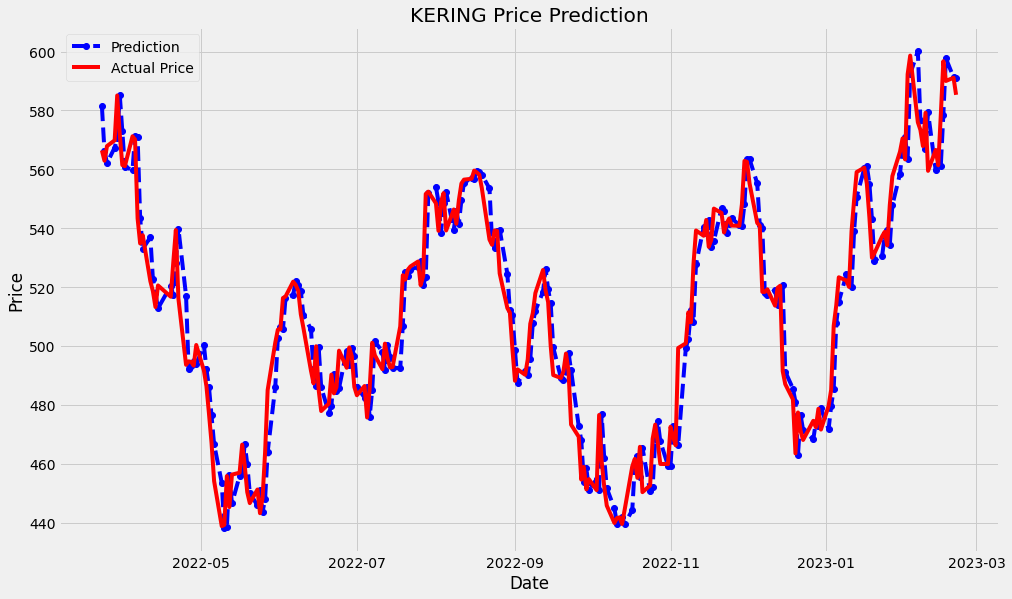

MAPE for KERING: 1.539%
Accuracy for KERING: 98.461%



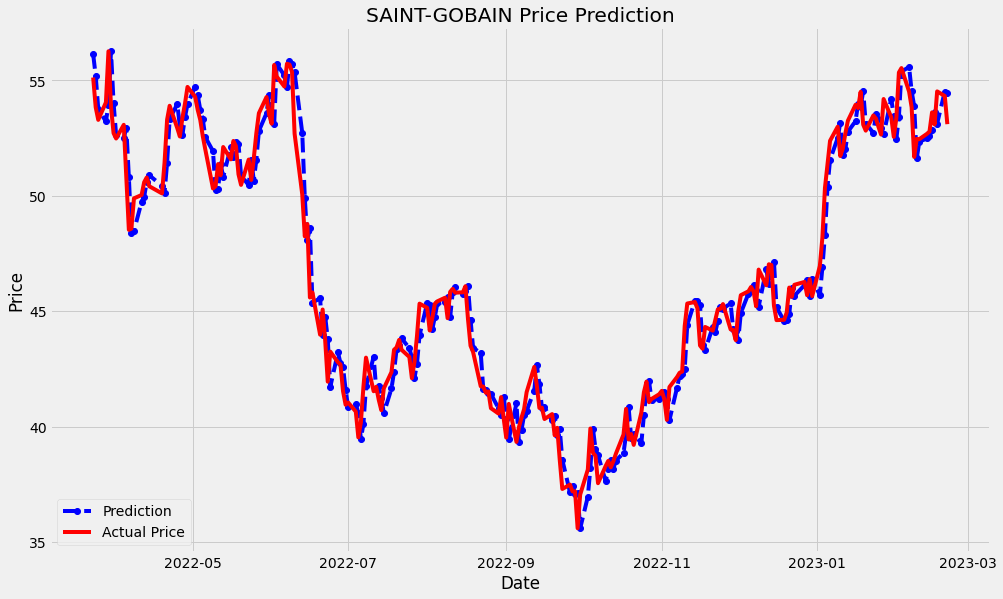

MAPE for SAINT-GOBAIN: 1.692%
Accuracy for SAINT-GOBAIN: 98.308%



In [ ]:
for i in range(len(actions)):
    action = actions[i]
    df3 = dfs[i]
    predictions = all_predictions[i]
    to_row2 = int(len(df3) * 0.7)
    testing_data2 = list(df3[to_row2:]['Adj Close'])
    date_range2 = df3[to_row2:].index
    plt.figure(figsize=(15, 9))
    plt.grid(True)
    plt.plot(date_range2, predictions, color='blue', marker='o', linestyle='dashed', label='Prediction')
    plt.plot(date_range2, testing_data2, color='red', label='Actual Price')
    plt.title(f'{entreprises_dict.get(action)} Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    MAPE = (np.mean(np.abs(np.array(predictions)-np.array(testing_data2))/np.abs(testing_data2)))
    MAPEper = MAPE*100
    MAPEper = round(MAPEper, 3)
    print(f"MAPE for {entreprises_dict.get(action)}: {MAPEper}%")

    Acc = 1-MAPE
    Accper = Acc*100
    Accper = round(Accper, 3)
    print(f"Accuracy for {entreprises_dict.get(action)}: {Accper}%\n")

**Prédiction test**

In [ ]:
all_future_predictions = []

In [ ]:
print(dfs)

In [ ]:
for df3 in dfs:
    to_row5 = int(len(df3) * 0.7)
    train_data = list(df3[0:to_row5]['Adj Close'])
    model = ARIMA(train_data, order=(45, 1, 45))
    model_fit = model.fit()
    future_predictions = model_fit.forecast(steps=150)
    all_future_predictions.append(future_predictions)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: Convergence

In [ ]:
print(future_predictions)

[56.60737636 56.26549921 56.01438237 55.69454034 56.15620337 56.41780922
 55.49853424 54.45386279 53.62351443 54.36189148 54.45251732 54.02699916
 52.87961984 52.67208815 52.37294376 53.71563783 53.90408244 53.4505136
 53.41428189 54.23866127 54.30345119 54.02138515 53.19700194 52.92459215
 52.59732463 53.03369551 52.59662358 51.52039804 51.90016654 52.89000767
 53.82175318 53.54437912 53.08860601 52.78923804 53.67506984 54.1322778
 54.31398533 53.58549271 53.31672518 53.54200791 54.01560255 53.82270148
 53.58823405 53.40655169 54.52399119 54.82074766 54.49854627 54.17345836
 54.16842029 54.70552768 54.95198833 54.54265537 53.54663034 53.51048242
 54.46645917 55.2750298  55.03123524 54.77912088 54.54967202 54.84913508
 55.13545882 54.98878479 54.19028245 54.19930419 54.32344605 54.65679299
 54.06446097 53.5811068  53.8426493  54.48150137 54.88468514 54.45652501
 53.92568    54.11108734 54.67141905 54.9540513  54.51282962 53.50529834
 53.18455039 53.58370939 54.02477948 53.77117393 53.6

In [ ]:
from pandas.tseries.offsets import BDay

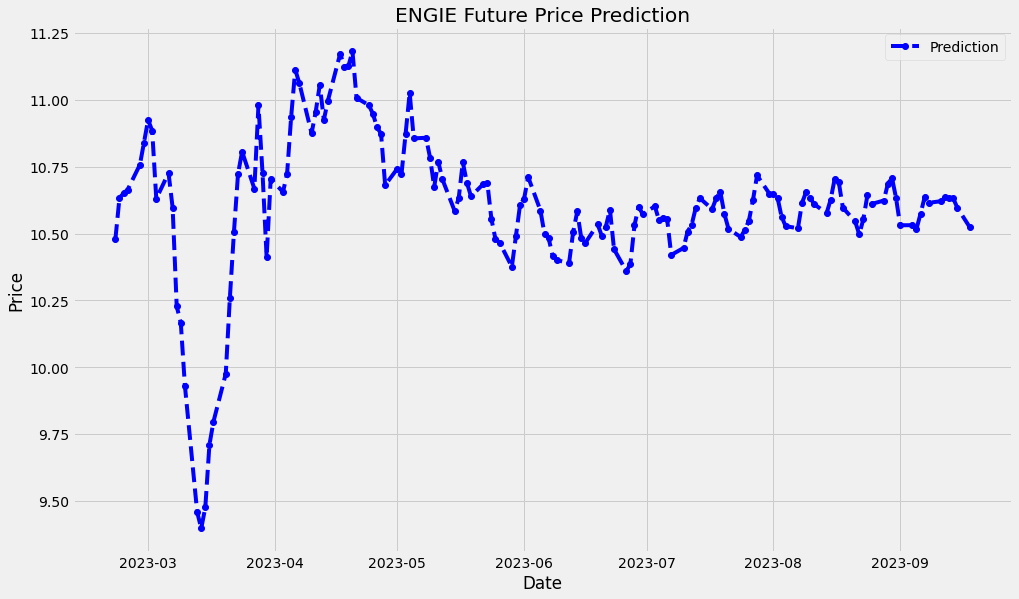

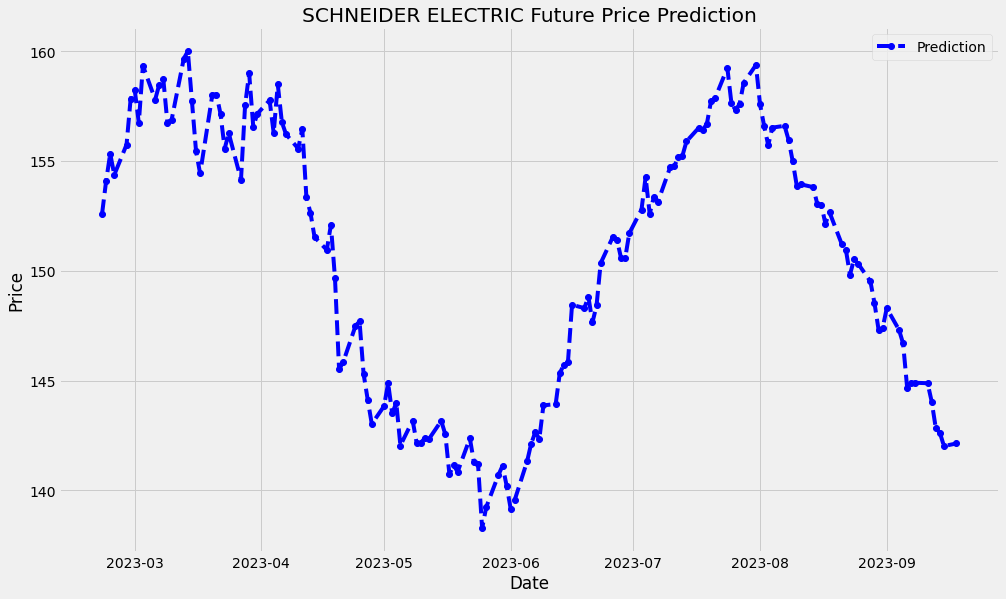

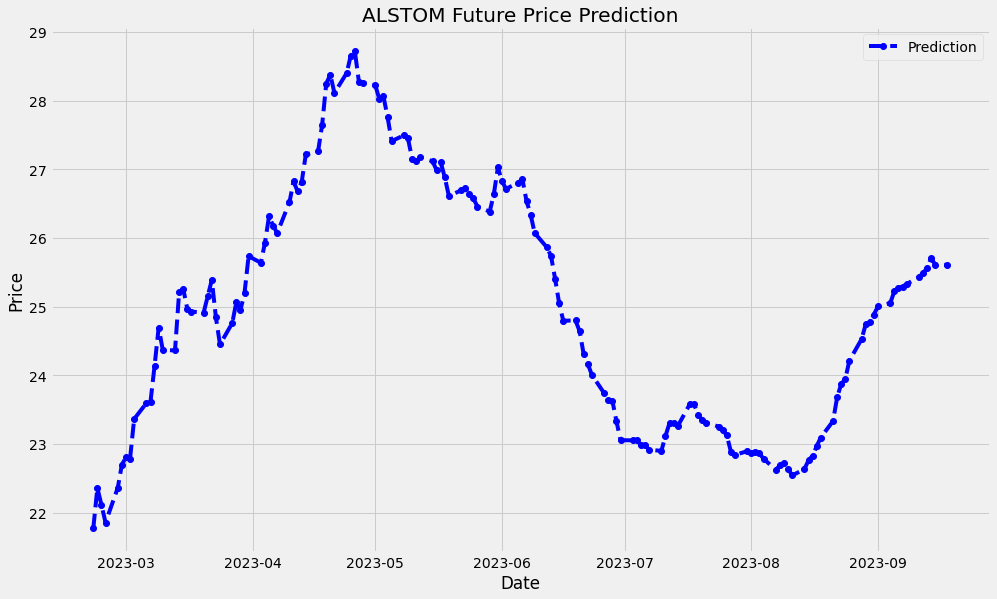

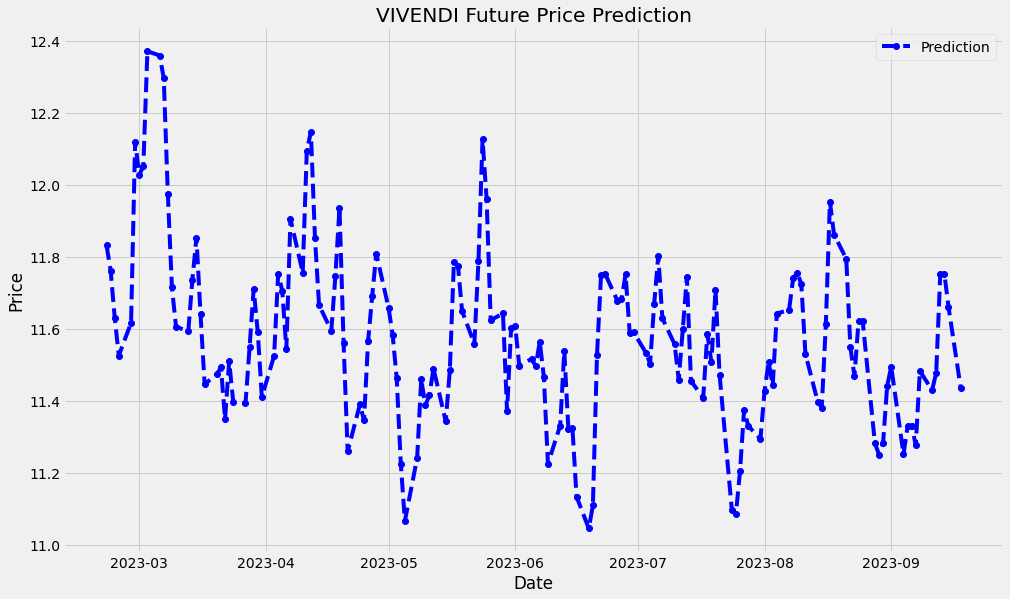

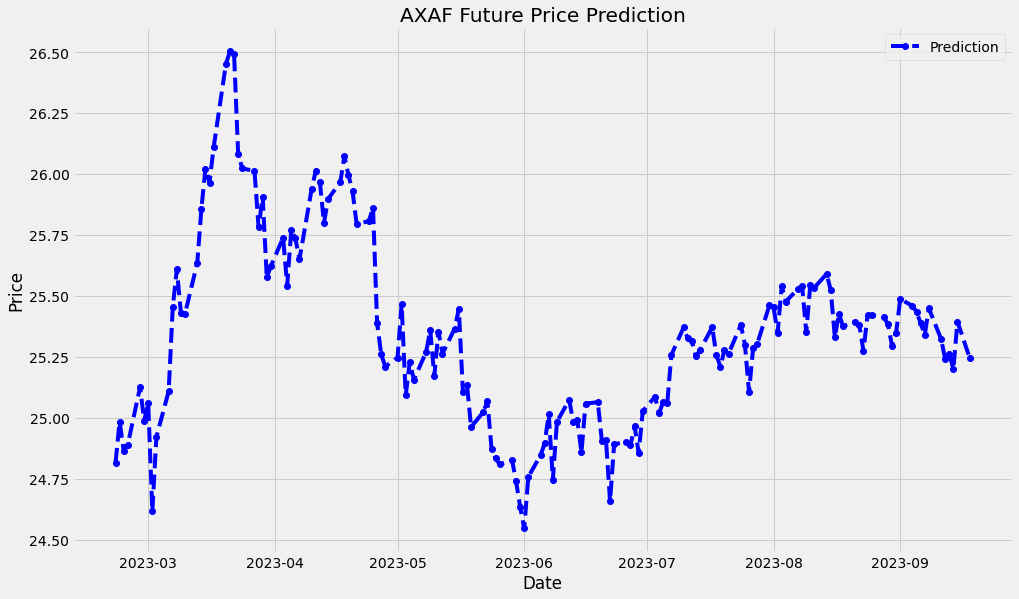

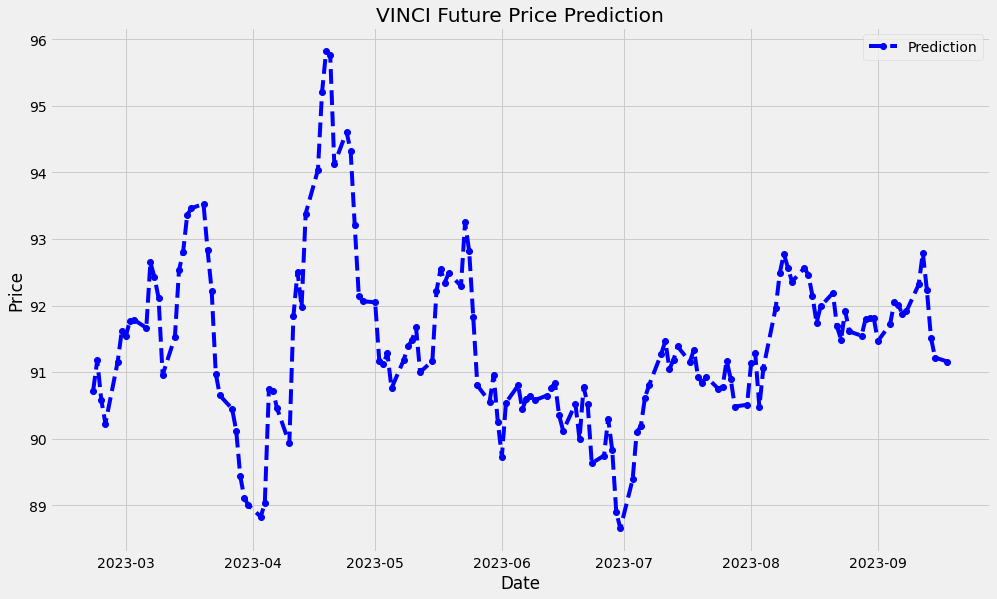

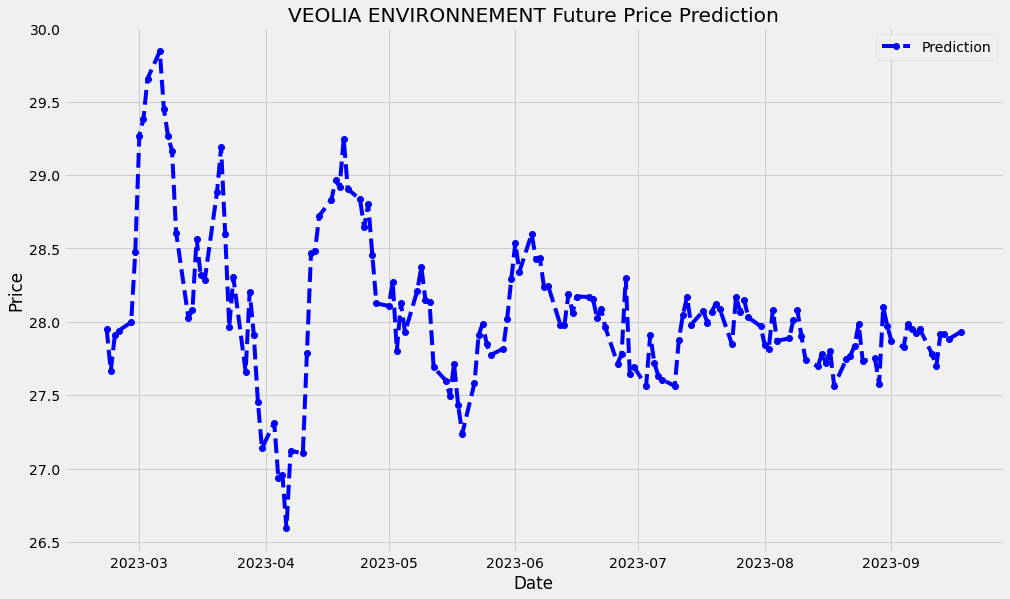

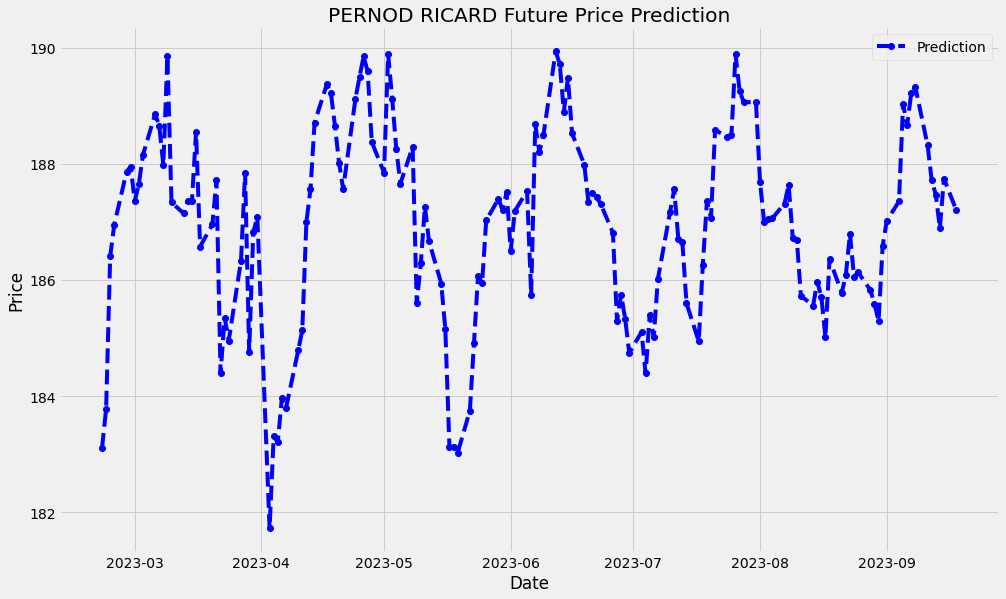

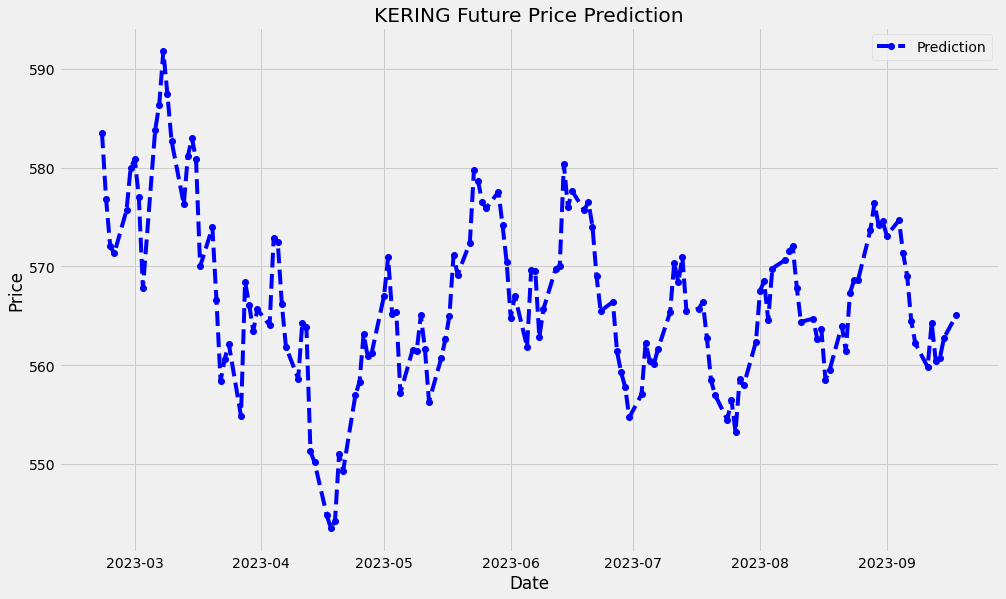

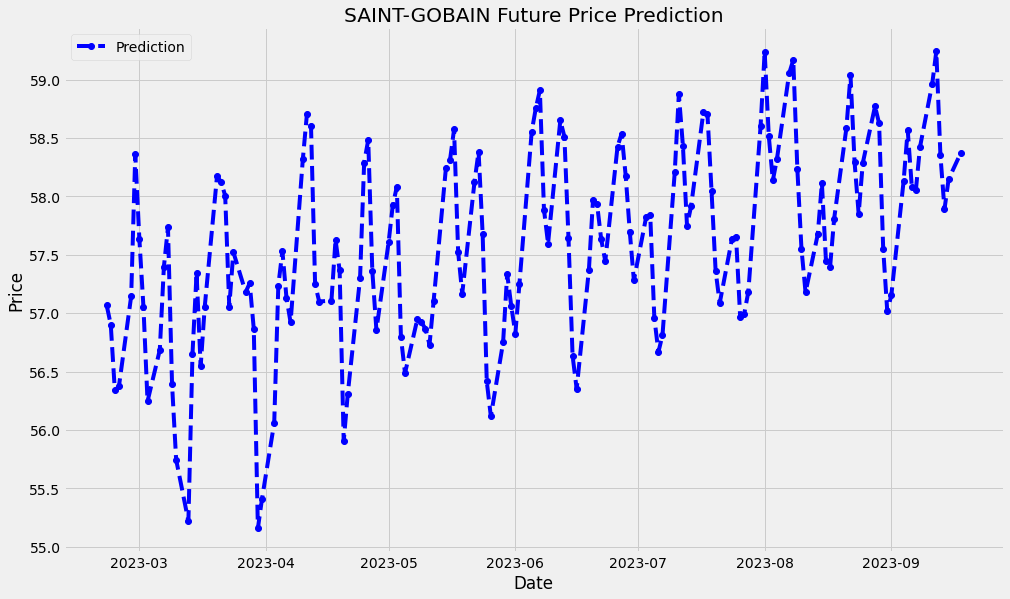

In [ ]:
for i in range(len(actions)):
    action = actions[i]
    df = dfs[i]
    predictions = all_future_predictions[i]
    date_range = pd.date_range(start=df.index[-1], periods=180, freq=BDay())
    predictions_dates = list(zip(date_range, predictions))

    plt.figure(figsize=(15, 9))
    plt.grid(True)
    plt.plot([x[0] for x in predictions_dates], [x[1] for x in predictions_dates], color='blue', marker='o', linestyle='dashed', label='Prediction')
    plt.title(f'{entreprises_dict.get(action)} Future Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [ ]:
print(predictions_dates)

[(Timestamp('2023-02-21 00:00:00', freq='B'), 56.60737636463211), (Timestamp('2023-02-22 00:00:00', freq='B'), 56.26549920962374), (Timestamp('2023-02-23 00:00:00', freq='B'), 56.01438237175244), (Timestamp('2023-02-24 00:00:00', freq='B'), 55.6945403358122), (Timestamp('2023-02-27 00:00:00', freq='B'), 56.15620337229673), (Timestamp('2023-02-28 00:00:00', freq='B'), 56.41780921833783), (Timestamp('2023-03-01 00:00:00', freq='B'), 55.49853423507031), (Timestamp('2023-03-02 00:00:00', freq='B'), 54.45386278883866), (Timestamp('2023-03-03 00:00:00', freq='B'), 53.62351442761881), (Timestamp('2023-03-06 00:00:00', freq='B'), 54.36189148105444), (Timestamp('2023-03-07 00:00:00', freq='B'), 54.452517315438826), (Timestamp('2023-03-08 00:00:00', freq='B'), 54.02699915709733), (Timestamp('2023-03-09 00:00:00', freq='B'), 52.87961984456869), (Timestamp('2023-03-10 00:00:00', freq='B'), 52.67208814568465), (Timestamp('2023-03-13 00:00:00', freq='B'), 52.372943755377214), (Timestamp('2023-03-14 